In [8]:
# load libraries
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline  
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

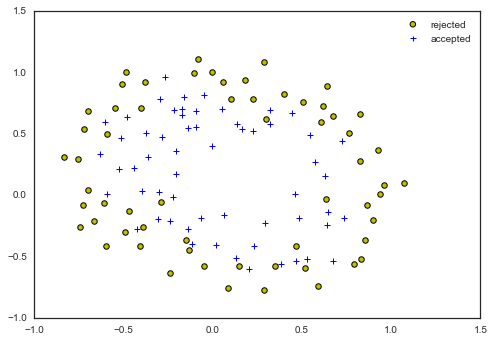

In [3]:
# load data
data = np.loadtxt('./data/ex2data2.txt',delimiter=',')

# seperate them into X and y
X = np.c_[data[:,:-1]]
y = np.c_[data[:,-1]]
m = np.size(y)

# plot
ind0=np.nonzero(y==0)[0]
ind1=np.nonzero(y==1)[0]
plt.scatter(X[ind0,0],X[ind0,1], s=30, c='y', marker='o', linewidths=1, label='rejected')
plt.scatter(X[ind1,0],X[ind1,1], s=30, c='b', marker='+', linewidths=1, label='accepted')
plt.legend()

In [79]:
# cost function
def costFunction(theta,reg,X,y):
    m=np.size(y)
    h=sp.special.expit(X.dot(theta))
    J=-(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))+reg/m/2*theta[1:].T.dot(theta[1:])
    if np.isnan(J[0]):
        return(np.inf)
    return(J)

In [78]:
def gradFunction(theta,reg,X,y):
    m=np.size(y)
    h=sp.special.expit(X.dot(theta))    
    J_der=(1/m)*X.T.dot(h-y)+(1/m)*reg*np.vstack([0,theta[1:]])
    return(J_der.flatten())

In [57]:
def predict(theta,X):
    h=sp.special.expit(X.dot(res.x))
    return((h>0.5).astype(int))

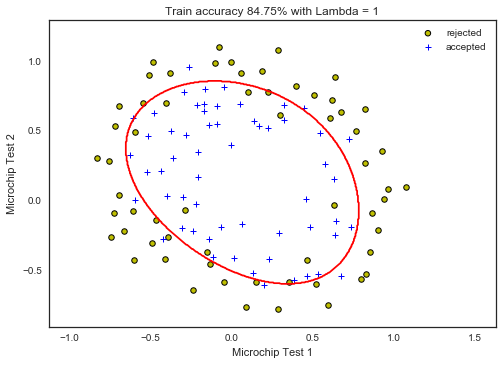

In [87]:
# mapping to higher powers
n_power = 3
X_ext = PolynomialFeatures(n_power).fit_transform(X)

initial_theta=np.c_[np.zeros(X_ext.shape[1])]  # the c_ is necessary, otherwise, not an array but a list, werid in matrix product

#run optimize
reg = 0
res = sp.optimize.minimize(costFunction,initial_theta,args=(reg,X_ext,y),options={'maxiter':400})

# Accuracy
accuracy = 100*sum(predict(res.x,X_ext) == y.ravel())/y.size  

# plot the decision boundary
xx1,xx2=np.meshgrid(np.linspace(-1,1.5,501),np.linspace(-0.8,1.2,401))
xx_ext=PolynomialFeatures(n_power).fit_transform(np.c_[xx1.ravel(), xx2.ravel()])
yy_ext=predict(res.x,xx_ext)
yy=yy_ext.reshape(xx1.shape)

# points
ind0=np.nonzero(y==0)[0]
ind1=np.nonzero(y==1)[0]
plt.scatter(X[ind0,0],X[ind0,1], s=30, c='y', marker='o', linewidths=1, label='rejected')
plt.scatter(X[ind1,0],X[ind1,1], s=30, c='b', marker='+', linewidths=1, label='accepted')
plt.legend()
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), 1))

# dividing line
plt.contour(xx1,xx2,yy,[0.5],colors='r')

In [ ]:
# I prefer lower power kernels, not easy to overfitting